# Análisis de correlación entre variables clínicas y funcionales.

Este notebook complementa el análisis exploratorio e inferencial del estudio de osteosarcopenia mediante un análisis transversal de correlación entre variables numéricas y ordinales. El objetivo es identificar posibles dependencias estadísticas entre indicadores clínicos, funcionales y antropométricos, independientemente de los objetivos clínicos originalmente planteados.

In [8]:
# librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# carga
df = pd.read_csv("../data/cleaned/df_limpio.csv")

In [10]:
# columnas numéricas en el dataset
numericas = df.select_dtypes(include=['float64', 'int64']).columns
numericas

Index(['edad', 'peso', 'altura_en_cm', 'altura_mencionada', 'imc',
       'circunferencia_de_la_pantorrilla', '%_de_grasa', '%_de_musculo',
       'masa_muscular_absoluta', 'imme', 'cadera_total', 'columna',
       'probabilidad_de_fractura_por_fragilidad',
       'probabilidad_de_fractura_de_cadera', 'fuerza_de_prension',
       'prueba_de_la_silla', 'resultado_de_ps', 'puntaje_de_balance',
       'velocidad_de_la_marcha', 'puntaje_de_velocidad_de_marcha',
       'puntaje_sppb', 'sarc_f_puntaje', 'resultado_de_lawton',
       'puntaje_de_katz'],
      dtype='object')

In [13]:
# se exluyen duplicados conceptuales o medidas demasiado específicas

variables_corr = [
    'edad',
    'peso',
    'altura_en_cm',
    'imc',
    'circunferencia_de_la_pantorrilla',
    '%_de_grasa',
    '%_de_musculo',
    'masa_muscular_absoluta',
    'fuerza_de_prension',
    'velocidad_de_la_marcha',
    'puntaje_sppb',
    'sarc_f_puntaje',
    'puntaje_de_katz',
    'resultado_de_lawton',
    'probabilidad_de_fractura_por_fragilidad',
    'probabilidad_de_fractura_de_cadera'

]

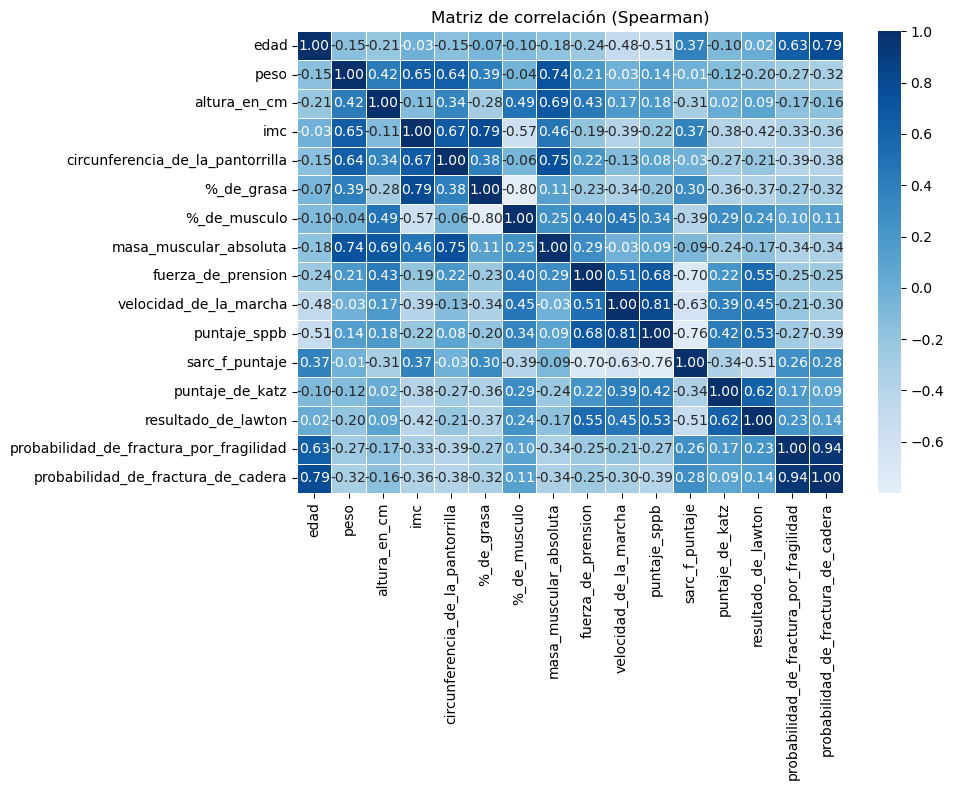

In [15]:
df_corr = df[variables_corr].copy()

# Spearmen
corr_matrix = df_corr.corr(method='spearman')

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0, fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación (Spearman)")
plt.tight_layout()
plt.savefig("../outputs/correlacion_spearman.png", dpi=300, bbox_inches='tight')
plt.show()